In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
#%matplotlib qt 

In [3]:
plt.rcParams['font.size'] = 12
#plt.style.use('ggplot')
plt.rcParams["axes.grid"] = True
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = 8, 4

In [4]:
from nu_smrutils import loaddat

In [5]:
dname = dict(BNCI2014004 = 'aBNCI2014004R.pickle',
             BNCI2014001 = 'aBNCI2014001R.pickle',
             Weibo2014   = 'aWeibo2014R.pickle',
             Physionet   = 'aPhysionetRR.pickle')

### Load data
Load EEG data for visualization

In [6]:
# itemname is one of : ['BNCI2014004', 'BNCI2014001', 'Weibo2014', 'Physionet']
itemname = 'BNCI2014001'

In [7]:
filename = dname[itemname]
iname = itemname + '__'    

data = loaddat(filename)
print('Number of subjects in data :', len(data))

Number of subjects in data : 9


In [8]:
# select data from on subject and use it for demostration
subject = 0

s1 = data[subject]
print(s1)

<Epochs  |   288 events (all good), 2 - 6 sec, baseline off, ~15.6 MB, data loaded,
 'left_hand': 144
 'right_hand': 144>


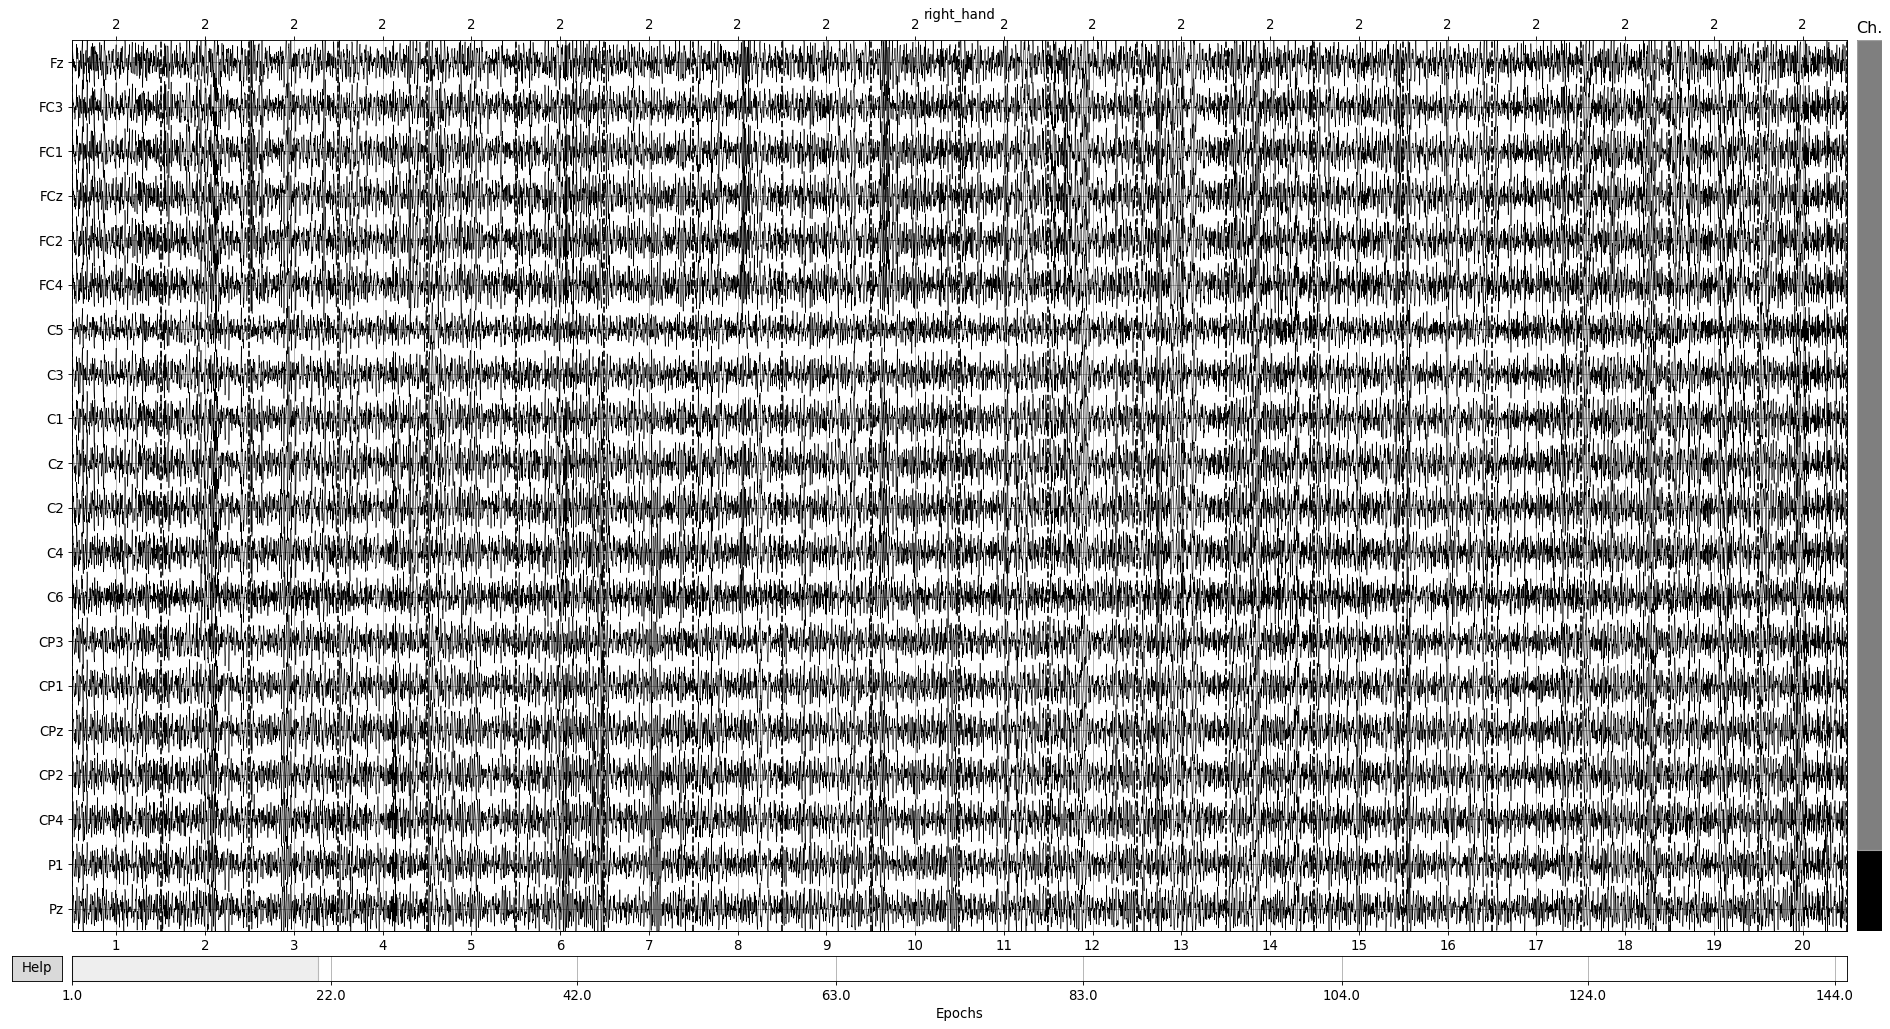

In [9]:
s1['right_hand'].plot();

    Using multitaper spectrum estimation with 7 DPSS windows


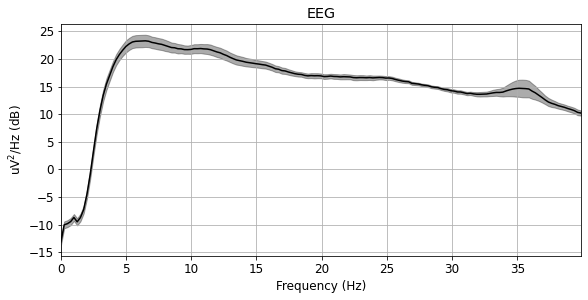

In [10]:
s1['right_hand'].plot_psd(fmin=0, fmax=45);

### Apply common-average reference

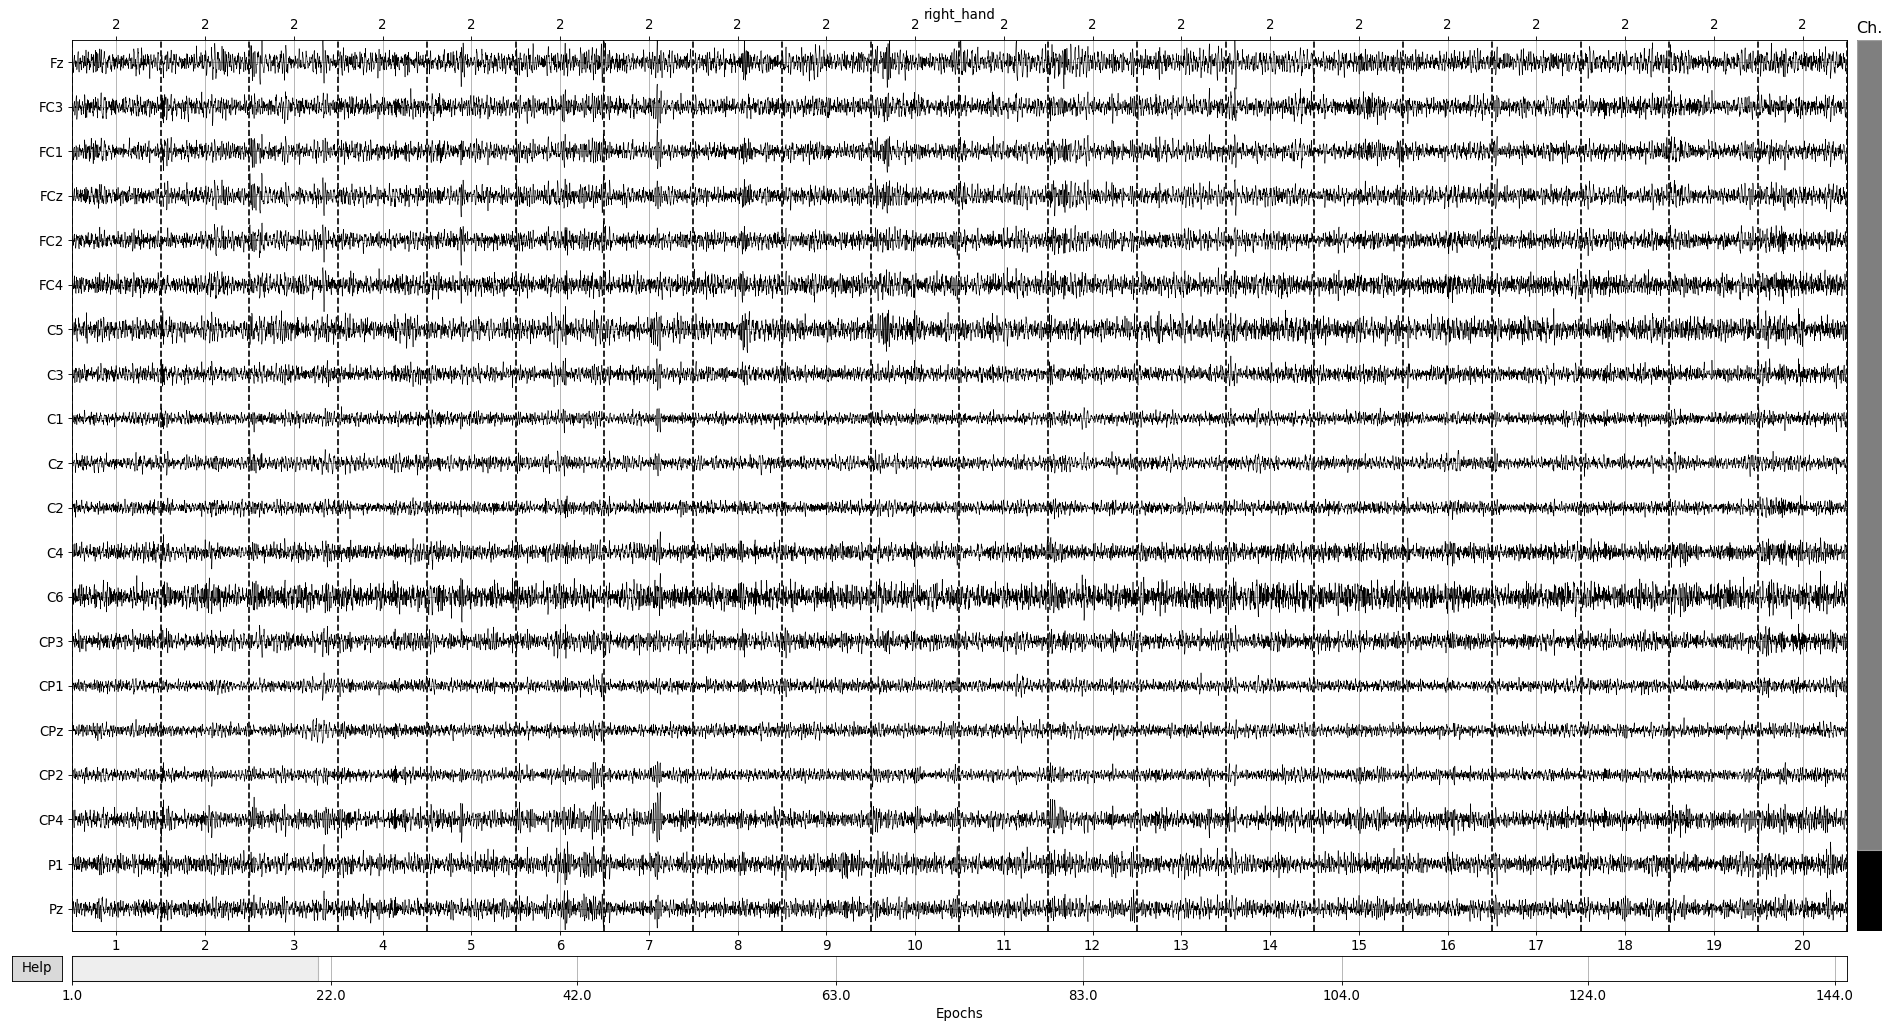

In [11]:
# use the average of all channels as reference
s1.set_eeg_reference(ref_channels='average')
s1['right_hand'].plot();

    Using multitaper spectrum estimation with 7 DPSS windows


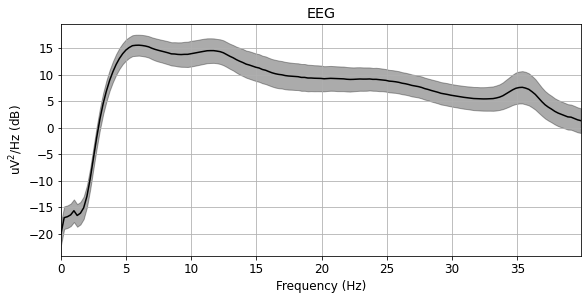

In [12]:
s1['right_hand'].plot_psd(fmin=0, fmax=45);

### Data info

In [13]:
print(s1.info)

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fz, FC3, FC1, FCz, FC2, FC4, C5, C3, C1, ...
    chs : list | 22 items (EEG: 22)
    comps : list | 0 items
    custom_ref_applied : bool | True
    dev_head_t : Transform | 3 items
    dig : list | 25 items (3 Cardinal, 22 EEG)
    events : list | 0 items
    highpass : float | 4.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 60.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 22
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 80.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplo

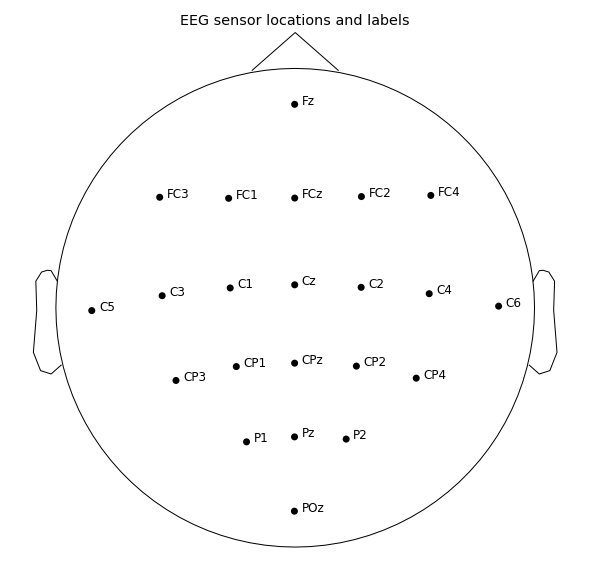

In [14]:
s1.plot_sensors(title = 'EEG sensor locations and labels',
                show_names = True);

### Band-pass filter
Apply band-pass filter to extract $\mu$ - band EEG features between (8 - 12) Hz

In [15]:
s1.filter(l_freq = 8, h_freq = 30)

<Epochs  |   288 events (all good), 2 - 6 sec, baseline off, ~15.6 MB, data loaded,
 'left_hand': 144
 'right_hand': 144>

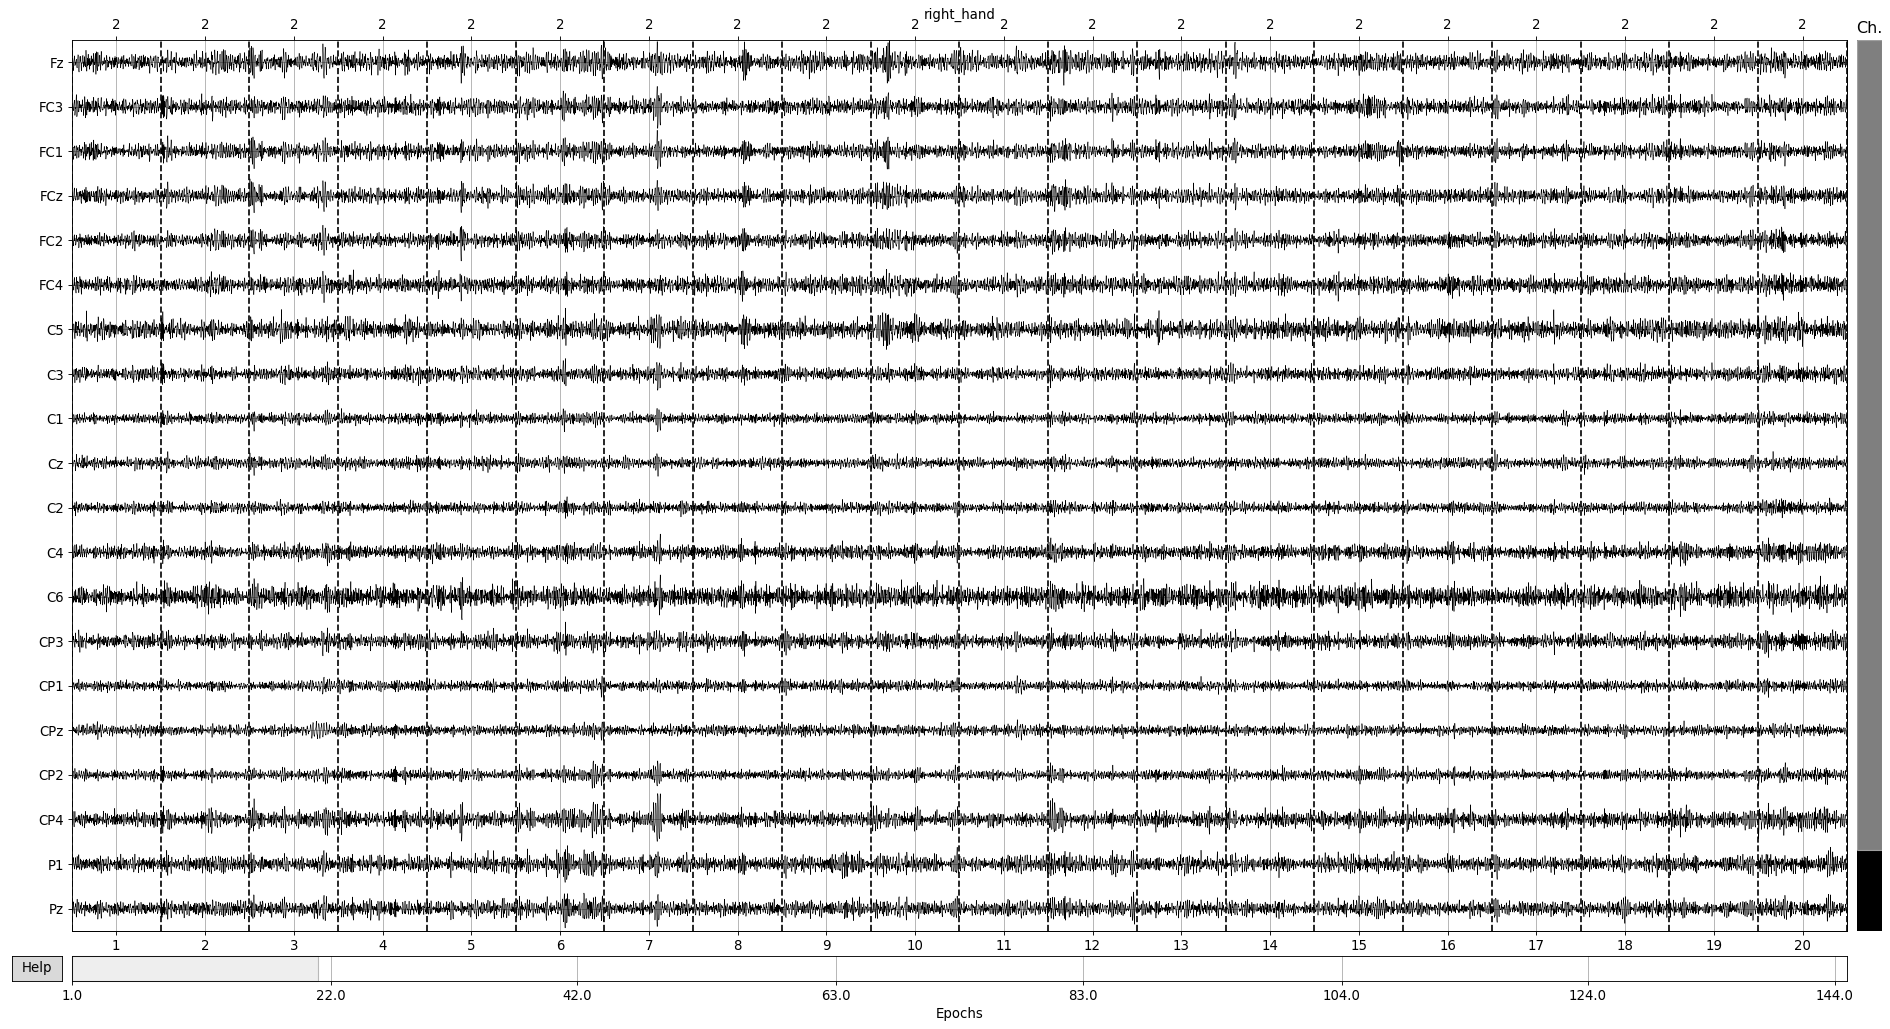

In [16]:
s1['right_hand'].plot();

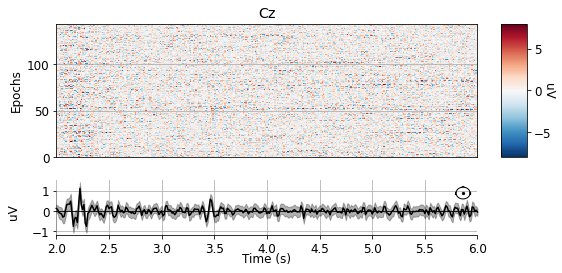

[<Figure size 576x288 with 4 Axes>]

In [17]:
s1['right_hand'].plot_image(picks = ['Cz'], scalings = dict(eeg=1e6))

    Using multitaper spectrum estimation with 7 DPSS windows


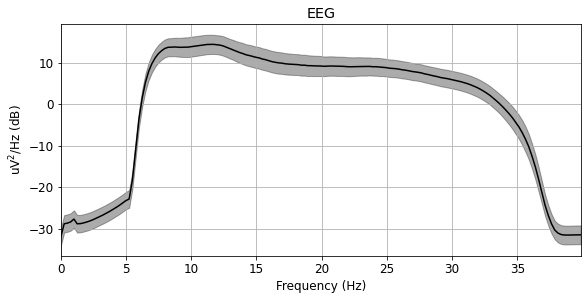

In [18]:
s1['right_hand'].plot_psd(fmin=0, fmax=45);

In [19]:
bands = [(4, 8, 'Theta'), (8, 12, 'Mu Rhythm'), (12, 30, 'Beta')]

    Using multitaper spectrum estimation with 7 DPSS windows


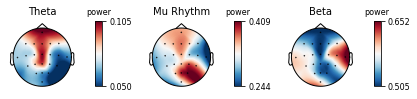

In [20]:
s1['right_hand'].plot_psd_topomap(bands = bands, normalize = True);

## Get numpy array and visualize 

In [21]:
print('EEG data is 3D numpy array (trials x channels x time samples) :', 
      s1['right_hand'].get_data().shape)

EEG data is 3D numpy array (trials x channels x time samples) : (144, 22, 321)


In [22]:
trial = 1
x = s1['right_hand'].get_data()[trial,:,:]
print('Channel x time samples :', x.shape)

Channel x time samples : (22, 321)


Plot single channel data from one trial

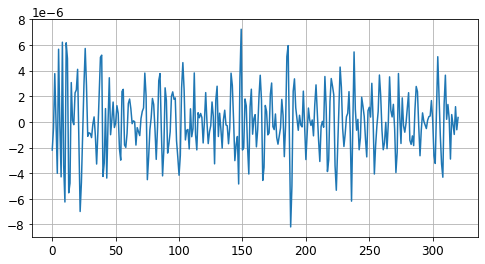

In [23]:
channel = 1
plt.plot(x[channel, :])